In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
print("Packages numpy, pandas and matplotlib sucessfully imported")

Packages numpy, pandas and matplotlib sucessfully imported


In [3]:
# Step 1: Load the dataset
print("1: Loading the dataset")
data = pd.read_csv("loan_data.csv")
# Checking columns / rows dimensions & types
columns = list(data.columns)
dimensions = data.shape
print("Dataset shape:", dimensions)
print(
    f"\nDimensions {dimensions} Data contains {dimensions[0]} rows and {dimensions[1]} columns"
)
print(f"Columns are {list(data.columns)}\n")
print(f"Dataset type: \n{data.dtypes}")
# print(f"{data.info()} \n ")
data.head()

1: Loading the dataset
Dataset shape: (307511, 122)

Dimensions (307511, 122) Data contains 307511 rows and 122 columns
Columns are ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURC

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Check some categorical data
data.groupby('NAME_CONTRACT_TYPE').count()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,,,,,,
Cash loans,278232,278232,278232,278232,278232,278232,278232,278232,278220,278232,...,278232,278232,278232,278232,240993,240993,240993,240993,240993,240993
Revolving loans,29279,29279,29279,29279,29279,29279,29279,29279,29279,29001,...,29279,29279,29279,29279,24999,24999,24999,24999,24999,24999


In [5]:
# Step 2: Checking for null values
print("Step 2: Checking for null values\n")
# print("Columns with null values:")
# null_counts = df.isnull().sum()
# columns_with_nulls = null_counts[null_counts > 0].index
# print(null_counts[columns_with_nulls].sort_values( ascending=False))

def check_null_values(df):
    null_counts = df.isnull().sum()
    null_percentages = 100 * null_counts / len(df)
    null_table = pd.concat([null_counts, null_percentages], axis=1, keys=['Count', 'Percentage'])
    return (null_table[null_table['Count'] > 0].sort_values('Percentage', ascending=False), null_counts)

# Check null values
null_table, null_counts = check_null_values(data)
print("Columns with null values:")
print(null_table)


Step 2: Checking for null values

Columns with null values:
                           Count  Percentage
COMMONAREA_MEDI           214865   69.872297
COMMONAREA_AVG            214865   69.872297
COMMONAREA_MODE           214865   69.872297
NONLIVINGAPARTMENTS_MEDI  213514   69.432963
NONLIVINGAPARTMENTS_MODE  213514   69.432963
...                          ...         ...
EXT_SOURCE_2                 660    0.214626
AMT_GOODS_PRICE              278    0.090403
AMT_ANNUITY                   12    0.003902
CNT_FAM_MEMBERS                2    0.000650
DAYS_LAST_PHONE_CHANGE         1    0.000325

[67 rows x 2 columns]


In [6]:
# Impute based on data types
columns_with_nulls = null_counts[null_counts > 0].index
if(len(columns_with_nulls) > 0):
    for col in columns_with_nulls:
        if data[col].dtype in ['int64', 'float64']:
            # For numerical columns, fill with median
            # data[col].fillna(data[col].median(), inplace=True)
            data.fillna({col:data[col].median()}, inplace=True)
        else:
            # For categorical columns, fill with mode
            # data[col].fillna(data[col].mode(), inplace=True)
            data.fillna({col:data[col].mode()}, inplace=True)
    print("\nNull values after u:")
    print(data.isnull().sum()[columns_with_nulls])
else:
    print("No null values")


Null values after u:
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                1292
OWN_CAR_AGE                       0
OCCUPATION_TYPE               96391
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_MON         0
AMT_REQ_CREDIT_BUREAU_QRT         0
AMT_REQ_CREDIT_BUREAU_YEAR        0
Length: 67, dtype: int64


In [7]:
# Step 3: Print the percentage of default to payer
print("Step 3: Calculating default to payer ratio\n")

# default_percentage = data['TARGET'].mean() * 100
# print(f"Percentage of defaults: {default_percentage:.2f}%")
target_counts = data['TARGET'].value_counts()
default = target_counts[1] / len(data) * 100
print(f'Percentage default {default:.2f}%')
print(f'Percentage of payers {100 - default:.2f}%')

percentages = data['TARGET'].value_counts(normalize=True) * 100

print("\nPercentages:\n", percentages.apply(lambda x: '{:,.2f}%'.format(x)))

Step 3: Calculating default to payer ratio

Percentage default 8.07%
Percentage of payers 91.93%

Percentages:
 TARGET
0    91.93%
1     8.07%
Name: proportion, dtype: object


In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
print("Packages for encoding and preprocesing successfully installed!")

# Steps 4 to 6
print("Steps 4 to 6")

print("Handle the categorical data before applying SMOTE\n")

# Preprocess data, handling missing values, encoding categorical variables, and scaling numerical features.

# Prepare features and target
X = data.drop(['TARGET'], axis=1)
y = data['TARGET']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("Encode columns and preprocess data")
# Preprocess numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocess categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

 # Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

 # Get feature names after preprocessing
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
feature_names = list(numeric_features) + list(cat_feature_names)

# Create a new dataframe with processed data
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)
X_processed_df.head()

Packages for encoding and preprocesing successfully installed!
Steps 4 to 6
Handle the categorical data before applying SMOTE

Encode columns and preprocess data


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_missing,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_missing
0,-1.733423,-0.577538,0.142129,-0.478095,-0.166143,-0.507236,-0.149452,1.506880,-0.456215,0.379837,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.733413,-0.577538,0.426792,1.725450,0.592683,1.600873,-1.252750,-0.166821,-0.460115,1.078697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.733403,-0.577538,-0.427196,-1.152888,-1.404669,-1.092145,-0.783451,-0.689509,-0.453299,0.206116,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-1.733384,-0.577538,-0.142533,-0.711430,0.177874,-0.653463,-0.928991,-0.680114,-0.473217,-1.375829,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.733374,-0.577538,-0.199466,-0.213734,-0.361749,-0.068554,0.563570,-0.892535,-0.473210,0.191639,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [9]:
# Define function to plot imbalanced/balanced
def plot_class_distribution(y, title):
    plt.figure(figsize=(8, 6))
    y.value_counts().plot(kind='bar')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

Balancing the dataset if the data is imbalanced
Data is imbalanced. Applying SMOTE...

Step 5: Plot the balanced/imbalanced data


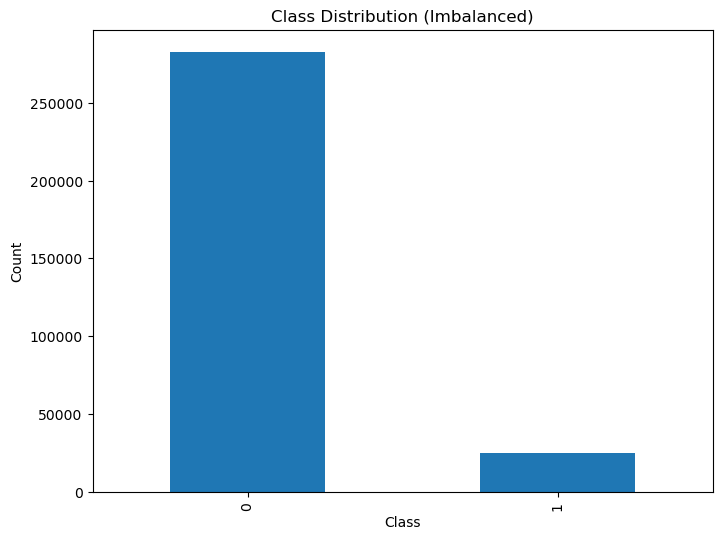

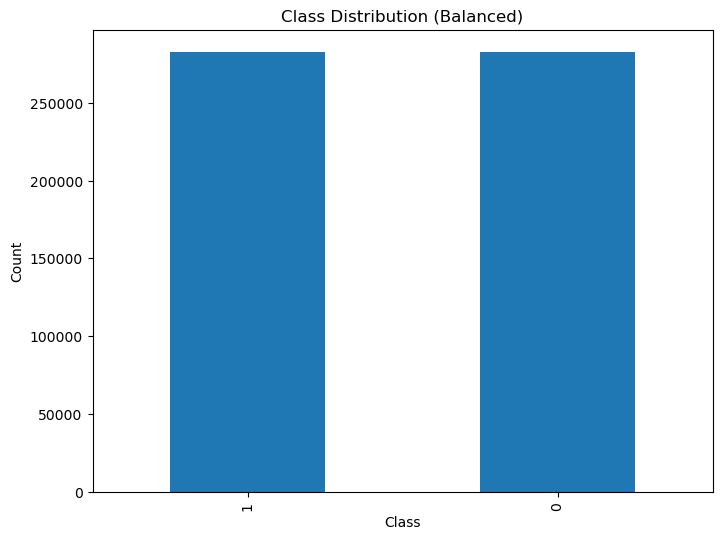

In [10]:
from imblearn.over_sampling import SMOTE

print("Balancing the dataset if the data is imbalanced")
def balance_dataset(X, y):
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X, y)
    return X_balanced, y_balanced

if default < 40 or default > 60:
    print("Data is imbalanced. Applying SMOTE...")
    # Balance the dataset
    X_balanced, y_balanced = balance_dataset(X_processed_df, y)
else:
    print("Data is relatively balanced. Skipping SMOTE.")
    
print("\nStep 5: Plot the balanced/imbalanced data")
plot_class_distribution(y, 'Class Distribution (Imbalanced)')
plot_class_distribution(pd.Series(y_balanced), 'Class Distribution (Balanced)')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Split the data, keeping SK_ID_CURR with X
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Separate SK_ID_CURR from the features
train_ids = X_train['SK_ID_CURR']
test_ids = X_test['SK_ID_CURR']
X_train = X_train.drop('SK_ID_CURR', axis=1)
X_test = X_test.drop('SK_ID_CURR', axis=1)

# Create and train the model
input_dim = X_train.shape[1]
model = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy', tf.keras.metrics.AUC()])

# train  
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)



/opt/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-22 10:37:42.587636: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-08-22 10:37:42.587691: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-08-22 10:37:42.587701: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-08-22 10:37:42.587907: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-22 10:37:42.587926: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Create

Epoch 1/10


2024-08-22 10:37:43.593416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


11308/11308 ━━━━━━━━━━━━━━━━━━━━ 105s 9ms/step - accuracy: 0.6940 - auc: 0.7570 - loss: 0.5856 - val_accuracy: 0.7528 - val_auc: 0.8312 - val_loss: 0.5183
Epoch 2/10
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 107s 9ms/step - accuracy: 0.7458 - auc: 0.8202 - loss: 0.5204 - val_accuracy: 0.7775 - val_auc: 0.8586 - val_loss: 0.4830
Epoch 3/10
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 108s 10ms/step - accuracy: 0.7657 - auc: 0.8416 - loss: 0.4927 - val_accuracy: 0.7989 - val_auc: 0.8807 - val_loss: 0.4507
Epoch 4/10
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 109s 10ms/step - accuracy: 0.7834 - auc: 0.8604 - loss: 0.4664 - val_accuracy: 0.8186 - val_auc: 0.9033 - val_loss: 0.4225
Epoch 5/10
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 109s 10ms/step - accuracy: 0.7933 - auc: 0.8731 - loss: 0.4470 - val_accuracy: 0.8298 - val_auc: 0.9167 - val_loss: 0.4041
Epoch 6/10
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 109s 10ms/step - accuracy: 0.8059 - auc: 0.8855 - loss: 0.4264 - val_accuracy: 0.8310 - val_auc: 0.9236 - val_loss: 0.3913
Epoch 7/10


3534/3534 ━━━━━━━━━━━━━━━━━━━━ 3s 728us/step
Sensitivity: 0.9089
ROC AUC: 0.9435


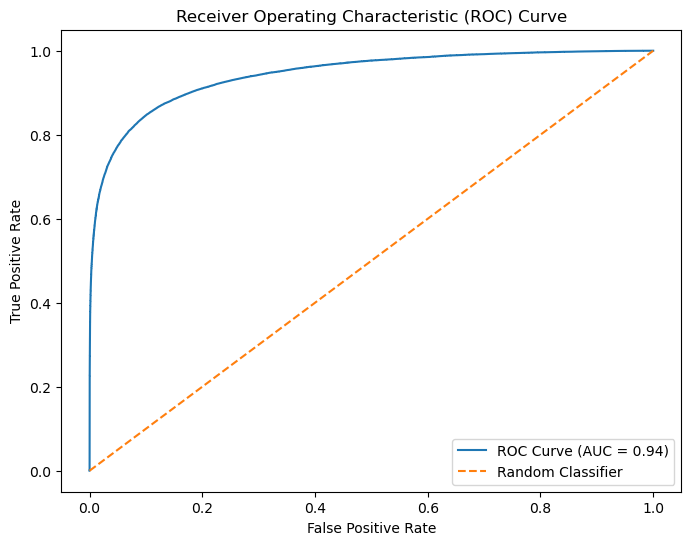

In [12]:
# Step 7 & 8: Calculate sensitivity and ROC AUC
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_classes).ravel()
    sensitivity = tp / (tp + fn)
    
    auc = roc_auc_score(y_test, y_pred)
    
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"ROC AUC: {auc:.4f}")
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Evaluate the model
evaluate_model(model, X_test, y_test)

### Conclusion
The blue curve (ROC) looks really good because it goes up quickly and stays high.
The ROC curve indicates a very strong predictive model with high discriminative power. It shows promise for reliable predictions across various threshold settings.

The high AUC suggests that the model will perform well on unseen data, assuming it's not overfitted. An AUC of 0.93 means the model has a 93% chance of correctly distinguishing between positive and negative classes.

The graph indicates that the model is very good at distinguishing between applicants who are likely to repay loans and those who are not, across many applicants